Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

Connect to CSV location folder in drive

In [ ]:
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


Data Collection

In [ ]:
data = pd.read_csv('traffic_volume_data.csv')
data.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,...,last_2_hour_traffic,last_3_hour_traffic,last_4_hour_traffic,last_5_hour_traffic,last_6_hour_traffic,hour,month_day,weekday,month,year
0,2012-10-02 15:00:00,0,184,64,3,328,7,7,293.17,0.0,...,4918.0,5026.0,4767.0,4516.0,5545.0,15,2,2,10,2012
1,2012-10-02 16:00:00,0,167,64,3,327,7,7,293.86,0.0,...,5181.0,4918.0,5026.0,4767.0,4516.0,16,2,2,10,2012
2,2012-10-02 17:00:00,0,119,63,3,327,6,6,294.14,0.0,...,5584.0,5181.0,4918.0,5026.0,4767.0,17,2,2,10,2012
3,2012-10-02 18:00:00,0,161,63,3,326,3,3,293.10,0.0,...,6015.0,5584.0,5181.0,4918.0,5026.0,18,2,2,10,2012
4,2012-10-02 19:00:00,0,243,62,3,326,8,8,290.97,0.0,...,5791.0,6015.0,5584.0,5181.0,4918.0,19,2,2,10,2012


# **Data Preparation**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33744 entries, 0 to 33743
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33744 non-null  object 
 1   is_holiday           33744 non-null  int64  
 2   air_pollution_index  33744 non-null  int64  
 3   humidity             33744 non-null  int64  
 4   wind_speed           33744 non-null  int64  
 5   wind_direction       33744 non-null  int64  
 6   visibility_in_miles  33744 non-null  int64  
 7   dew_point            33744 non-null  int64  
 8   temperature          33744 non-null  float64
 9   rain_p_h             33744 non-null  float64
 10  snow_p_h             33744 non-null  float64
 11  clouds_all           33744 non-null  int64  
 12  weather_type         33744 non-null  object 
 13  weather_description  33744 non-null  object 
 14  traffic_volume       33744 non-null  int64  
 15  last_1_hour_traffic  33744 non-null 

Data Selection

In [ ]:
data = data.sample(10000).reset_index(drop=True)
X = data[['weekday', 'hour', 'month_day', 'year', 'month', 'weather_type']]
target = ['traffic_volume']
y = data[target]

Data Labeling

In [ ]:
from sklearn.cluster import KMeans

x = data[['traffic_volume']]
cluster = KMeans(n_clusters=3)
cluster.fit(y)
data['traffic_density'] = cluster.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X.head()

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type
0,0,277.82,7,20,26,2017,3,Mist
1,0,279.26,1,18,5,2012,11,Clear
2,0,287.55,3,22,7,2014,5,Rain
3,0,291.74,1,18,20,2013,5,Rain
4,0,293.96,4,19,20,2015,8,Clear


Data Transformation

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
X['weather_type'] = labelencoder.fit_transform(X['weather_type'])

<ipython-input-16-7f73d5e2d231>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['weather_type'] = labelencoder.fit_transform(X['weather_type'])


In [ ]:
X.head()

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type
0,0,277.82,7,20,26,2017,3,5
1,0,279.26,1,18,5,2012,11,0
2,0,287.55,3,22,7,2014,5,6
3,0,291.74,1,18,20,2013,5,6
4,0,293.96,4,19,20,2015,8,0


# **Data Visualization**

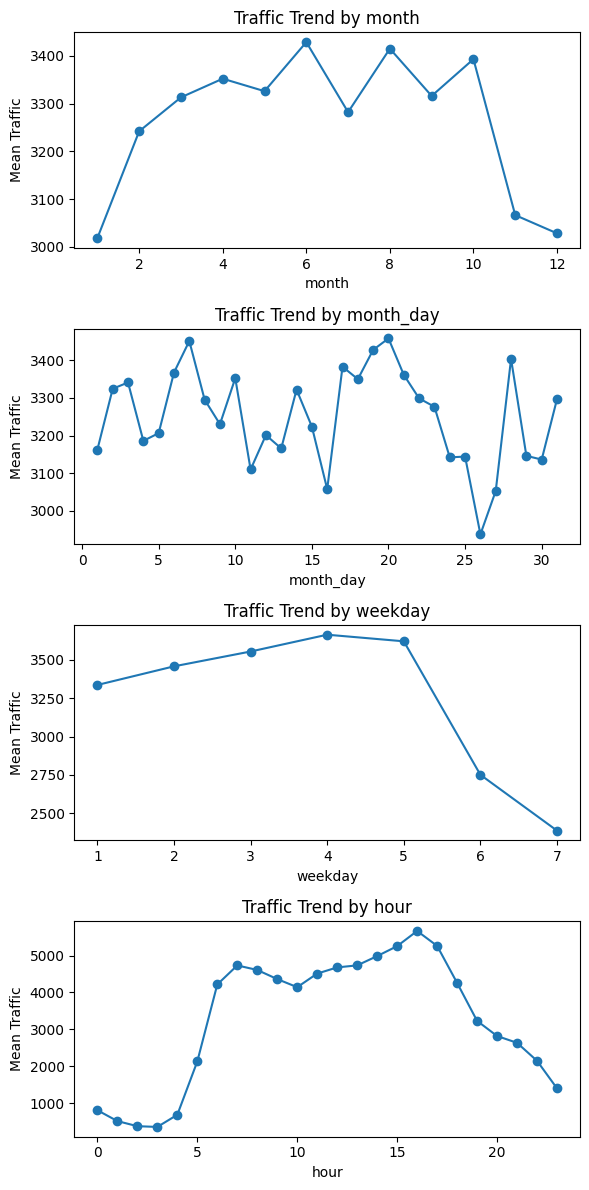

In [ ]:
metrics = ['month', 'month_day', 'weekday', 'hour']
fig = plt.figure(figsize=(6, 3*len(metrics)))
for i, metric in enumerate(metrics):
	ax = fig.add_subplot(len(metrics), 1, i+1)
	ax.plot(data.groupby(metric)['traffic_volume'].mean(), '-o')
	ax.set_xlabel(metric)
	ax.set_ylabel("Mean Traffic")
	ax.set_title(f"Traffic Trend by {metric}")
plt.tight_layout()
plt.show()

# **Model Training**

## Neural **Network**

Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x_scaler = MinMaxScaler()
X_scaled = x_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y)

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(random_state=1, max_iter=500).fit(X_scaled, y_scaled)
new_X = model.predict(X_scaled)
print('predicted output :\n', new_X[:10])
print('Actual output :\n', y_scaled[:10])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predicted output :
 [0.37319472 0.58447819 0.30487023 0.57844275 0.5710642  0.57712803
 0.71571109 0.5506574  0.72850621 0.40317878]
Actual output :
 [[0.38076923]
 [0.58585165]
 [0.23214286]
 [0.57651099]
 [0.49148352]
 [0.77252747]
 [0.87953297]
 [0.58475275]
 [0.7510989 ]
 [0.4010989 ]]


## KNN **Algorithm**

In [ ]:
from sklearn.model_selection import train_test_split

y = data['traffic_density']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier (n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      2940
           1       0.84      0.76      0.80      2123
           2       0.64      0.57      0.60      1937

    accuracy                           0.75      7000
   macro avg       0.75      0.73      0.74      7000
weighted avg       0.75      0.75      0.75      7000



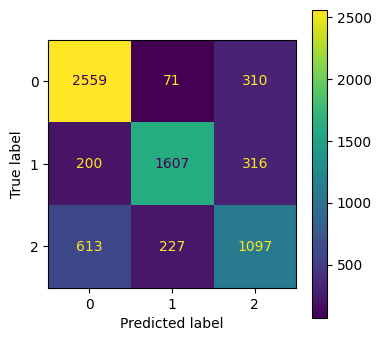

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(4, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
print(classification_report (y_test, y_pred))